In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
data = pd.read_fwf('auto-mpg.data', na_values="?", names=['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model year', 'origin', 'car name'])
data['origin'] = data['origin'].astype('category')

<AxesSubplot:>

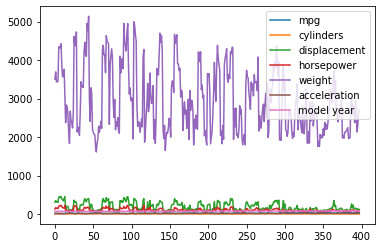

In [3]:
data.plot()

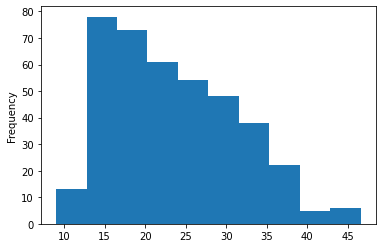

In [4]:
data['mpg'].plot.hist();

In [5]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

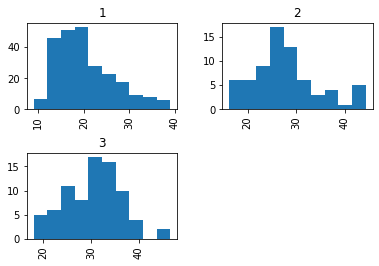

In [6]:
axs = data.hist(column='mpg', by='origin')

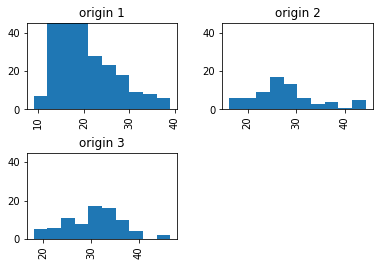

In [7]:
axs = data.hist(column='mpg', by='origin')
axs[0][0].set(title='origin 1', ylim=[0, 45])
axs[0][1].set(title='origin 2', ylim=[0, 45])
axs[1][0].set(title='origin 3', ylim=[0, 45]);

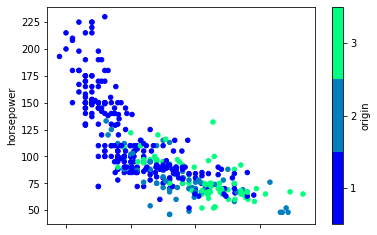

In [8]:
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='winter');

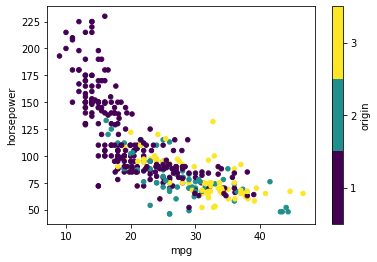

In [9]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='viridis', ax=ax);


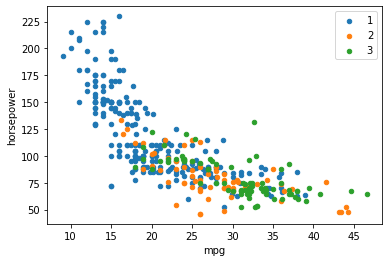

In [10]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax);

In [11]:
import seaborn as sns

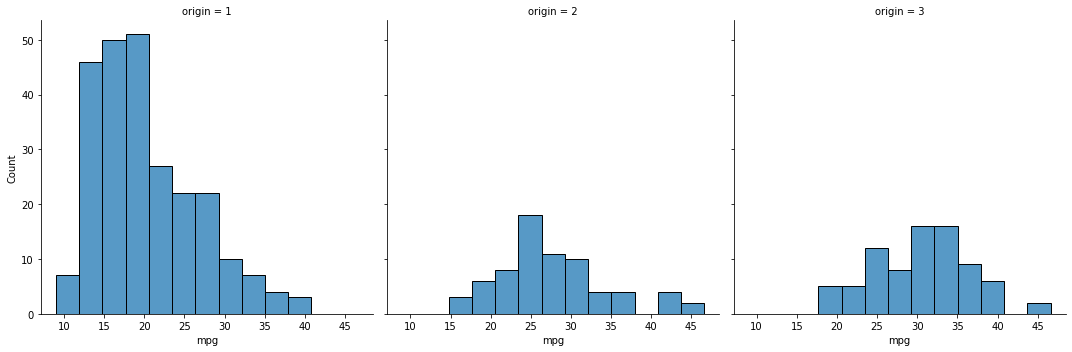

In [12]:
# Use gender to split age into columns
sns.displot(x='mpg', col='origin', data=data);

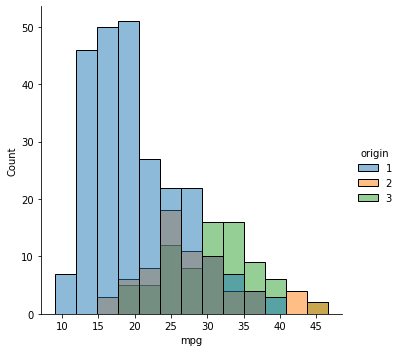

In [13]:
# Use origin to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data);

To have an idea of the split between male and female, we can stack the counts, adding up to total.

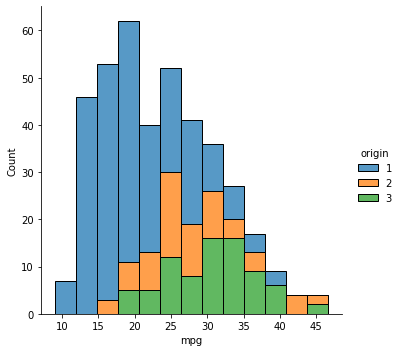

In [14]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in ages with a boxplot too

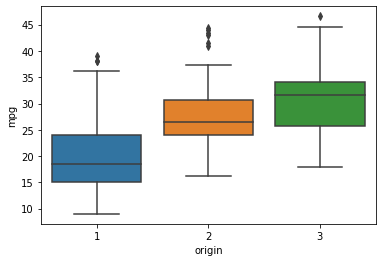

In [15]:
sns.boxplot(x='origin', y='mpg', data=data);

In [16]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['origin 1', 'origin 2', 'origin 3'])

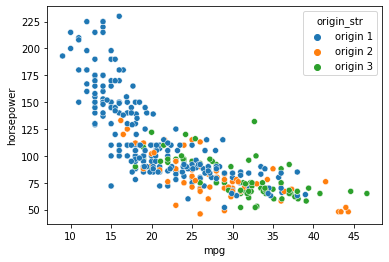

In [17]:
ax = sns.scatterplot(x='mpg', y='horsepower', data=data, hue='origin_str')

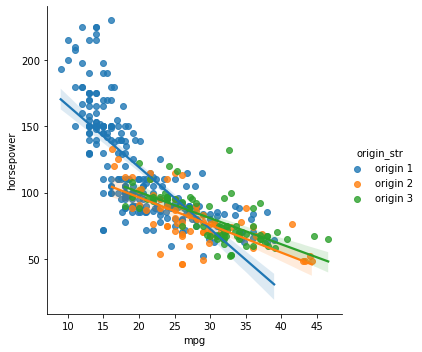

In [18]:
ax = sns.lmplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

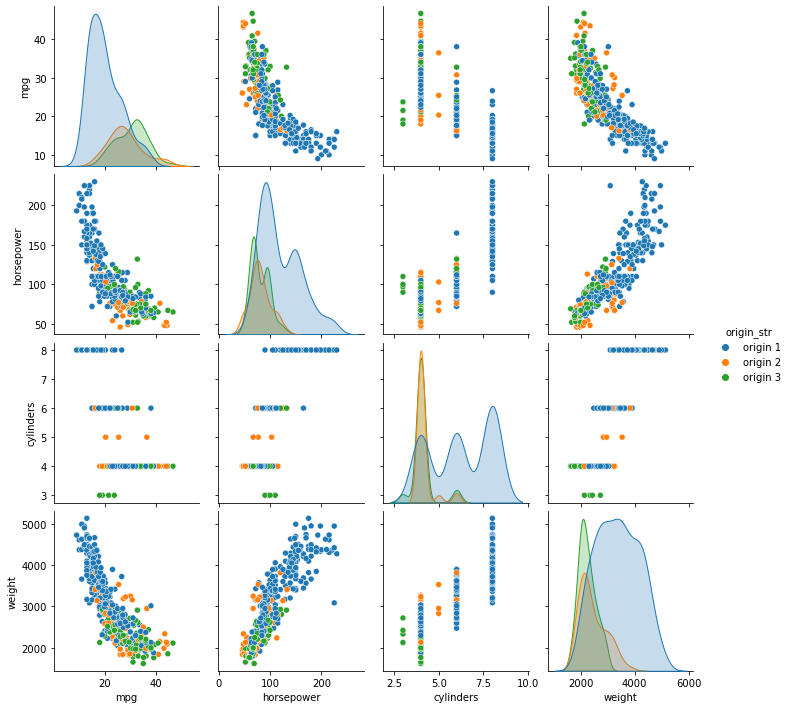

In [19]:
sns.pairplot(data, vars=['mpg', 'horsepower', 'cylinders', 'weight'], hue='origin_str');

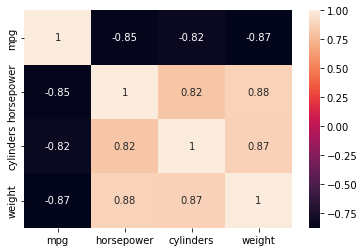

In [20]:
g = sns.heatmap(data[['mpg', 'horsepower', 'cylinders', 'weight']].corr(method='spearman'), 
            annot=True)